In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit import QuantumRegister
algorithm_globals.random_seed = 42

C:\Users\11928\AppData\Local\Temp\ipykernel_9448\1112477010.py:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B


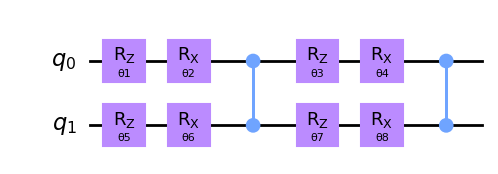

In [2]:


birckworkstate = QuantumCircuit(2)


# Define the quantum circuit and registers
qr = QuantumRegister(2, 'q')
birckworkstate = QuantumCircuit(qr)

# Define the variational parameters
θ_1 = Parameter('θ1')
θ_2 = Parameter('θ2')
θ_3 = Parameter('θ3')
θ_4 = Parameter('θ4')
θ_5 = Parameter('θ5')
θ_6 = Parameter('θ6')
θ_7 = Parameter('θ7')
θ_8 = Parameter('θ8')

# Apply R_z(θ_1) with parameter θ_1 on qubit 0
birckworkstate.rz(θ_1, qr[0])
# Apply R_x(θ_2) with parameter θ_2 on qubit 0
birckworkstate.rx(θ_2, qr[0])
# Apply R_z(θ_5) with parameter θ_5 on qubit 1
birckworkstate.rz(θ_5, qr[1])
# Apply R_x(θ_6) with parameter θ_6 on qubit 1
birckworkstate.rx(θ_6, qr[1])
# Apply CZ(Control:qubit 0, Target:qubit 1)
birckworkstate.cz(qr[0], qr[1])
# Apply R_z(θ_3) with parameter θ_3 on qubit 0
birckworkstate.rz(θ_3, qr[0])
# Apply R_x(θ_4) with parameter θ_4 on qubit 0
birckworkstate.rx(θ_4, qr[0])
# Apply R_z(θ_7) with parameter θ_7 on qubit 1
birckworkstate.rz(θ_7, qr[1])
# Apply R_x(θ_8) with parameter θ_8 on qubit 1
birckworkstate.rx(θ_8, qr[1])
# Apply CZ(Control:qubit 0, Target:qubit 1)
birckworkstate.cz(qr[0], qr[1])
# Draw the circuit
birckworkstate.draw('mpl')

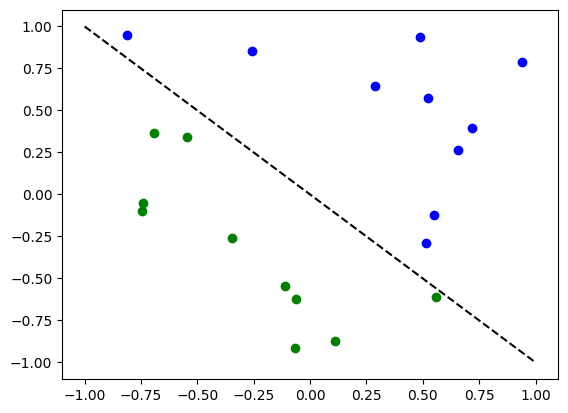

In [3]:
num_inputs = 2
num_samples = 20
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

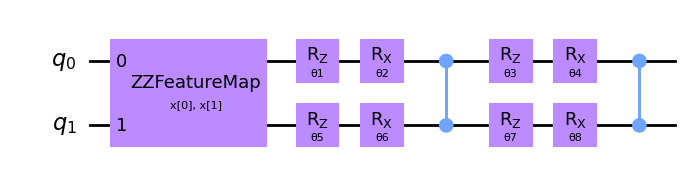

In [3]:
# construct QNN
qc = QuantumCircuit(2)
feature_map = ZZFeatureMap(2)
ansatz = birckworkstate
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

In [5]:
estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [6]:
# QNN maps inputs to [-1, +1]
estimator_qnn.forward(X[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[0.50207199]])

In [7]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [8]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=200), callback=callback_graph
)

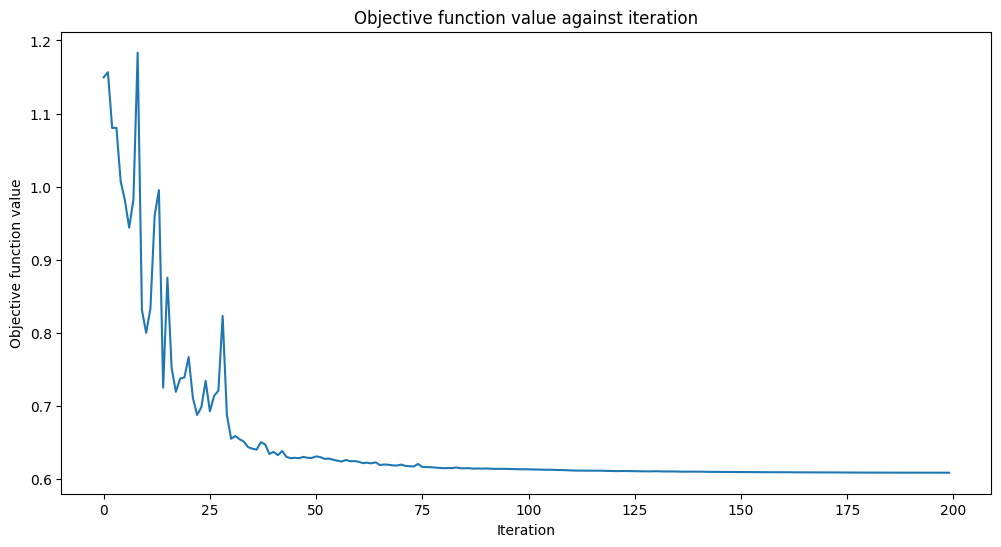

0.85

In [9]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X, y)

In [8]:
import numpy as np

class DiscreteGradientDescent:
    def __init__(self, initial_params, learning_rate=0.1, max_iter=100, tol=1e-4):
        self.params = np.array(initial_params)
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def compute_cost(self, params):
        # Function to compute the cost given the parameters
        # This needs to be implemented based on the specific VQC and the problem
        pass

    def compute_discrete_gradient(self):
        # Calculate the discrete gradient
        # This involves evaluating the cost function for discrete steps and choosing the direction that minimizes the cost
        gradient = np.zeros_like(self.params)
        for i in range(len(self.params)):
            current_cost = self.compute_cost(self.params)
            best_step = 0
            best_cost = current_cost

            for step in range(8):  # discrete steps from 0 to 7
                test_params = np.copy(self.params)
                test_params[i] += step * np.pi / 4
                test_cost = self.compute_cost(test_params)
                if test_cost < best_cost:
                    best_cost = test_cost
                    best_step = step

            gradient[i] = best_step * np.pi / 4

        return gradient

    def update_params(self, gradient):
        # Update the parameters based on the gradient
        # Since this is a discrete update, we directly add the gradient step
        self.params += gradient

    def optimize(self):
        # Main optimization loop
        for _ in range(self.max_iter):
            gradient = self.compute_discrete_gradient()
            self.update_params(gradient)

            # Convergence check (can be customized)
            if np.linalg.norm(gradient) < self.tol:
                break

        return self.params


In [11]:
# Initialize the parameters
initial_params = [θ_1, θ_2, θ_3, θ_4, θ_5, θ_6, θ_7, θ_8]

# Initialize the DiscreteGradientDescent optimizer with initial parameters
discrete_optimizer = DiscreteGradientDescent(initial_params, learning_rate=0.01, max_iter=200)

# Instantiate the VQC with the DiscreteGradientDescent optimizer
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=discrete_optimizer,  # Use the discrete optimizer

)


In [14]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(X, y_one_hot)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(X, y_one_hot)

AttributeError: 'DiscreteGradientDescent' object has no attribute 'minimize'

In [31]:
# evaluate data points
y_predict = vqc.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y_one_hot, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

QiskitMachineLearningError: 'The model has not been fitted yet'